# Prediksi Nilai Tukar Rupiah Terhadap Dollar Tahun 2021
pada kondisi nilai tukar: stabil, tidak stabil, sangat tidak stabil \
menggunakan Random Walk Model.

In [254]:
import pandas as pd
import numpy as np
import math, datetime
import random

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [255]:
df = pd.read_csv("USD_IDR Historical Data.csv")
df = df[['Date','Price']]
df

,Date,Price
0,"Jun 08, 2020","13,885.0"
1,"Jun 05, 2020","13,870.0"
2,"Jun 04, 2020","14,095.0"
3,"Jun 03, 2020","14,095.0"
4,"Jun 02, 2020","14,415.0"
...,...,...
2597,"Jun 14, 2010","9,165.0"
2598,"Jun 11, 2010","9,200.0"
2599,"Jun 10, 2010","9,227.5"
2600,"Jun 09, 2010","9,250.0"


In [256]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)   #set kolom 'Date' sebagai index


df.sort_index(inplace= True)    #Mengurutkan index 'Date' dari yang past sampai present
df

,Price
Date,
2010-06-08,"9,250.0"
2010-06-09,"9,250.0"
2010-06-10,"9,227.5"
2010-06-11,"9,200.0"
2010-06-14,"9,165.0"
...,...
2020-06-02,"14,415.0"
2020-06-03,"14,095.0"
2020-06-04,"14,095.0"


In [257]:
df = df.replace(',','', regex = True)   #Mengatasi comma style number
df = df.replace('%','', regex = True)   #Mengatasi kolom change berlabel %
df

,Price
Date,
2010-06-08,9250.0
2010-06-09,9250.0
2010-06-10,9227.5
2010-06-11,9200.0
2010-06-14,9165.0
...,...
2020-06-02,14415.0
2020-06-03,14095.0
2020-06-04,14095.0


In [258]:
df = df[["Price"]].astype(float)   #mengubah type data menjadi float

# Random Walk Model untuk 1 tahun ke depan (2021)

## Asumsi nilai tukar stabil

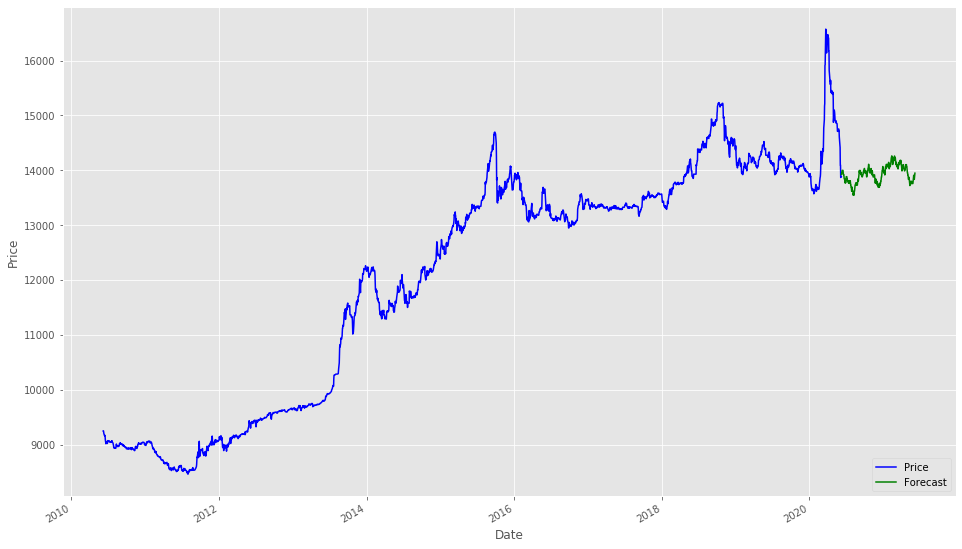

In [259]:
df.dropna(inplace=True)

# Prepare variables for loop

last_close = df['Price'][-1]
last_date = df.iloc[-1].name.timestamp()
df['Forecast'] = np.nan

for i in range(365):
    # Create np.Array of current predictions to serve as input for future predictions
    modifier = random.randint(-1, 1) / 365 + 1    
    last_close *= modifier
    next_date = datetime.datetime.fromtimestamp(last_date)
    last_date += 86400

    # Outputs data into DataFrame to enable plotting
    df.loc[next_date] = [np.nan, last_close]

df['Price'].plot(figsize = (16,10), color = "blue")
df['Forecast'].plot(color = "g")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [260]:
df

,Price,Forecast
Date,,
2010-06-08 00:00:00,9250.0,NaN
2010-06-09 00:00:00,9250.0,NaN
2010-06-10 00:00:00,9227.5,NaN
2010-06-11 00:00:00,9200.0,NaN
2010-06-14 00:00:00,9165.0,NaN
...,...,...
2021-06-03 07:00:00,NaN,13872.707181
2021-06-04 07:00:00,NaN,13834.699764
2021-06-05 07:00:00,NaN,13872.603051


## Asumsi nilai tukar tidak stabil

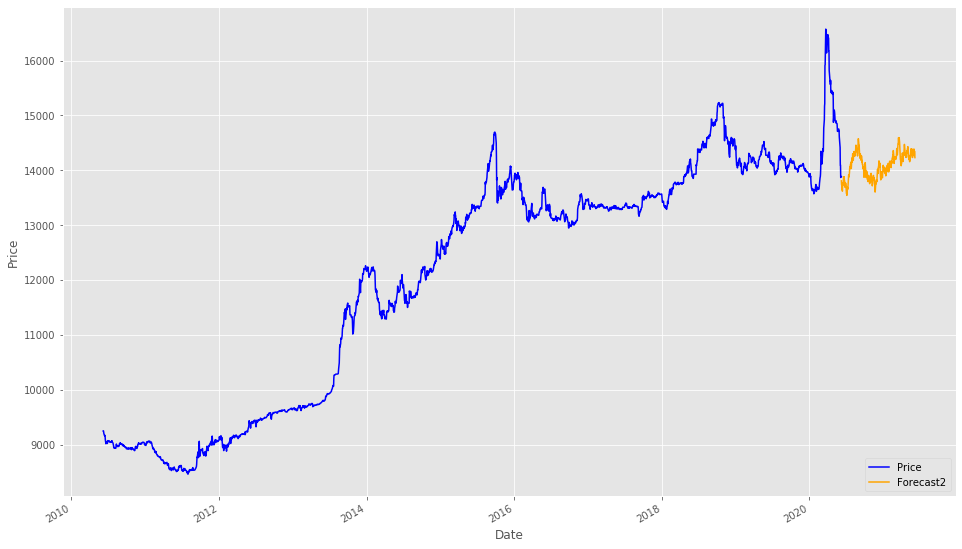

In [261]:
df1 = df
df1.drop("Forecast", axis = 1, inplace = True)
df1.dropna(inplace=True)

# Prepare variables for loop

last_close1 = df1['Price'][-1]
last_date1 = df1.iloc[-1].name.timestamp()
df1['Forecast2'] = np.nan

for i in range(365):
    # Create np.Array of current predictions to serve as input for future predictions
    modifier1 = random.randint(-2, 2) / 365 + 1    
    last_close1 *= modifier1
    next_date1 = datetime.datetime.fromtimestamp(last_date1)
    last_date1 += 86400

    # Outputs data into DataFrame to enable plotting
    df1.loc[next_date1] = [np.nan, last_close1]

df1['Price'].plot(figsize = (16,10), color = "blue")
df1['Forecast2'].plot(color = "orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [262]:
df1

,Price,Forecast2
Date,,
2010-06-08 00:00:00,9250.0,NaN
2010-06-09 00:00:00,9250.0,NaN
2010-06-10 00:00:00,9227.5,NaN
2010-06-11 00:00:00,9200.0,NaN
2010-06-14 00:00:00,9165.0,NaN
...,...,...
2021-06-03 07:00:00,NaN,14350.323079
2021-06-04 07:00:00,NaN,14271.691172
2021-06-05 07:00:00,NaN,14349.892219


## Asumsi nilai tukar sangat tidak stabil

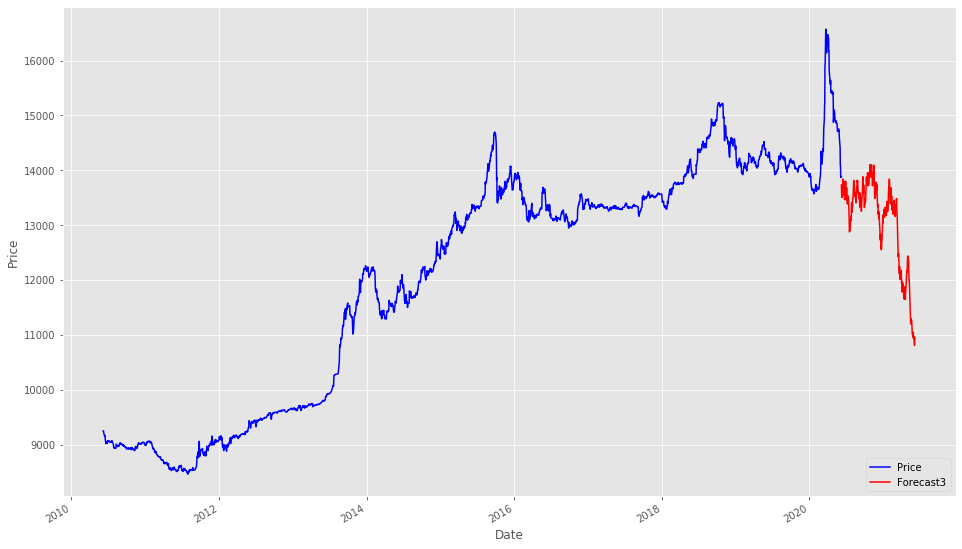

In [263]:
df2 = df
df2.drop("Forecast2", axis = 1, inplace = True)
df2.dropna(inplace=True)

# Prepare variables for loop

last_close2 = df2['Price'][-1]
last_date2 = df2.iloc[-1].name.timestamp()
df1['Forecast3'] = np.nan

for i in range(365):
    # Create np.Array of current predictions to serve as input for future predictions
    modifier2 = random.randint(-4, 4) / 365 + 1    
    last_close2 *= modifier2
    next_date2 = datetime.datetime.fromtimestamp(last_date2)
    last_date2 += 86400

    # Outputs data into DataFrame to enable plotting
    df2.loc[next_date2] = [np.nan, last_close2]

df2['Price'].plot(figsize = (16,10), color = "blue")
df2['Forecast3'].plot(color = "red")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [264]:
df2

,Price,Forecast3
Date,,
2010-06-08 00:00:00,9250.0,NaN
2010-06-09 00:00:00,9250.0,NaN
2010-06-10 00:00:00,9227.5,NaN
2010-06-11 00:00:00,9200.0,NaN
2010-06-14 00:00:00,9165.0,NaN
...,...,...
2021-06-03 07:00:00,NaN,10896.003986
2021-06-04 07:00:00,NaN,10866.151920
2021-06-05 07:00:00,NaN,10806.611362
